In [3]:
# SENTIMENT ANALYSIS 

#Import Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

import nltk
import re

import string

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

sentiments=SentimentIntensityAnalyzer()

from wordcloud import WordCloud , STOPWORDS , ImageColorGenerator

nltk.download('stopwords')
from nltk.corpus import stopwords

stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
#To extract reviews from multiple pages
all_reviews = []
for page_num in range(1, 10):

    url_source = 'https://www.airlinequality.com/airline-reviews/british-airways/?sortby=post_date%3ADesc&pagesize=100&page={page_num}'
    url=url_source.format(page_num=page_num)
    r=requests.get(url)

#extract data using BeautifulSoup library
soup=BeautifulSoup(r.content, 'lxml')

reviews = soup.find_all('h2', {'class': "text_header"})
div_reviews = soup.find_all('div', {'class': "text_content"})
                                    
#To add the reviews of the next page one after the other
review2 = ' '
for review in reviews:
    review2 += review.text.strip() + '\n'
                                    
for div_review in div_reviews:
    review2 + div_review.text.strip() + '\n'
all_reviews.append(review2)
                                    
print(all_reviews)

[' "no sandwiches left to purchase"\n"another very good flight"\n"don\'t provide free food and drink"\n"way below expected service"\n"onboard charity collection is inappropriate"\n"staff were so friendly"\n"comfort and service superb"\n"good overall experience"\n"cabin crew were very friendly"\n"delayed by 20 mins"\n"middle name was not on her ticket"\n"charged 4 times for one bag"\n"cabin manager did not greet me"\n"no proof I paid for them"\n"Awful airline"\n" Flight is again delayed"\n"This flight was a delight"\n"we had to print out boarding passes"\n"You get what you pay for"\n"Awful, rude airline"\n"Seats the same as economy"\n"we had limited recline seats seats"\n"Overall a good flight"\n"crew are so friendly"\n"excellent with service"\n"cabin crew where fantastic"\n"utter nightmares"\n"the shortage of staff"\n"lacks personalized attention"\n"missed my connecting flight"\n"said that I need to check my baggage"\n"inflight service was distinctly average"\n"delayed due to maintenan

In [5]:
#Extract into a csv file
for review in all_reviews:
    with open('BA_Review.csv', 'a', encoding = 'utf-8') as f:
        f.write(review + '\n')

In [6]:
#Load input dataframe
df = pd.read_csv(r"C:\\Users\\USER\\Documents\\Jupyter Workings\\BA_Review.csv")
df

,REVIEW
0,no sandwiches left to purchase
1,another very good flight
2,don't provide free food and drink
3,way below expected service
4,onboard charity collection is inappropriate
...,...
595,No room to move
596,"staff wonderful. cheerful, efficient"
597,it was the most enjoyable flight
598,I never received the refund


In [7]:
print(df.head(10))

                                        REVIEW
0               no sandwiches left to purchase
1                     another very good flight
2            don't provide free food and drink
3                   way below expected service
4  onboard charity collection is inappropriate
5                       staff were so friendly
6                   comfort and service superb
7                      good overall experience
8                cabin crew were very friendly
9                           delayed by 20 mins


In [8]:
#check for null values
print(df.isnull().sum())

REVIEW    0
dtype: int64


In [9]:
stemmer=nltk.SnowballStemmer("english")

In [12]:
#Apply regex to remove unwanted characters
# cleaned_text = re.sub(pattern, " ", str(REVIEW))

#Clean Datatset
def clean(text):
	text=str(text).lower()
	text=re.sub('\[.*?\]', '',text)
	text=re.sub('https?://\S+|WWW\.\S+','',text)
	text=re.sub('<.*?>+','',text)
	text=re.sub('\n','',text)
	text=re.sub('\W*\d\W*','',text)
	#ext=re.sub('[%%S]' %% re.escape(string.punctuation),'',text)
	
	text=[word for word in text.split(' ')]
	text=" ".join(text)
	text=[stemmer.stem(word) for word in text.split(' ')]
	text=" ".join(text)
	return text

df["REVIEW"]=df["REVIEW"].apply(clean)

In [13]:
df["REVIEW"].apply(clean)

0                 no sandwich left to purcha
1                     anoth veri good flight
2           don't provid free food and drink
3                    way below expect servic
4      onboard chariti collect is inappropri
                       ...                  
595                          no room to move
596        staff wonderful. cheerful, effici
597             it was the most enjoy flight
598                i never receiv the refund
599                  not too bad, all in all
Name: REVIEW, Length: 600, dtype: object

In [14]:
# SENTIMENT INTNSITY ANALYSIS
nltk.download('vader_lexicon')
sentiments=SentimentIntensityAnalyzer()
#for i in df["REVIEW"]:
    #df['Positive']=[sentiments.polarity_scores(i)["pos"]]

df['Positive']=[sentiments.polarity_scores(i)["pos"] for i in df["REVIEW"]]
df['Negative']=[sentiments.polarity_scores(i)["neg"] for i in df["REVIEW"]]
df['Neutral']=[sentiments.polarity_scores(i)["neu"] for i in df["REVIEW"]]

df=df[["REVIEW","Positive","Negative","Neutral"]]

print(df.head(10))

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                  REVIEW  Positive  Negative  Neutral
0            no sandwich left to purchas     0.000     0.355    0.645
1                 anoth veri good flight     0.492     0.000    0.508
2       don't provid free food and drink     0.000     0.351    0.649
3                way below expect servic     0.000     0.000    1.000
4  onboard chariti collect is inappropri     0.000     0.000    1.000
5                   staff were so friend     0.578     0.000    0.422
6              comfort and servic superb     0.767     0.000    0.233
7                     good overal experi     0.592     0.000    0.408
8            cabin crew were veri friend     0.444     0.000    0.556
9                            delay bymin     0.000     0.697    0.303


In [15]:
#Overall Sentiment Score
#Determine the Average Polarity Score
x=sum(df["Positive"])
y=sum(df["Negative"])
z=sum(df["Neutral"])

def sentiment_score(a,b,c):
    if (a>b) and (a>c):
        print("Positive")
    elif (b>a) and (b>c):
        print("Negative")
    else:
        print("Neutral")
        
print("Positive:", x)
print("Negative::", y)
print("Neutral:", z)

sentiment_score(x,y,z)


Positive: 110.60999999999999
Negative:: 67.23799999999991
Neutral: 422.14599999999996
Neutral


<function matplotlib.pyplot.show(close=None, block=None)>

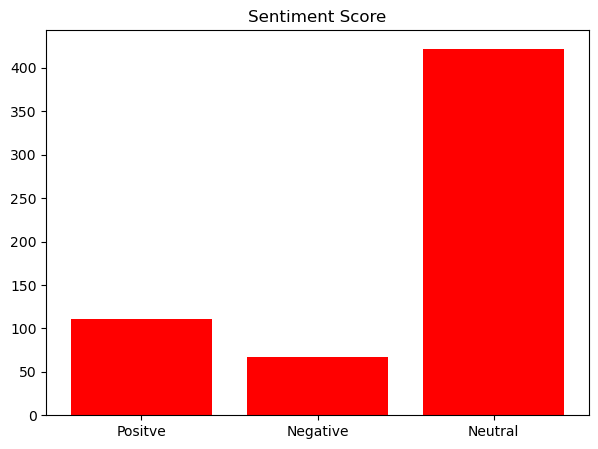

In [45]:
#Create a bar chart
plt.figure(figsize=(7,5))
plt.title('Sentiment Score')
plt.bar(['Positve','Negative','Neutral'], [x,y,z], color='red')

plt.show

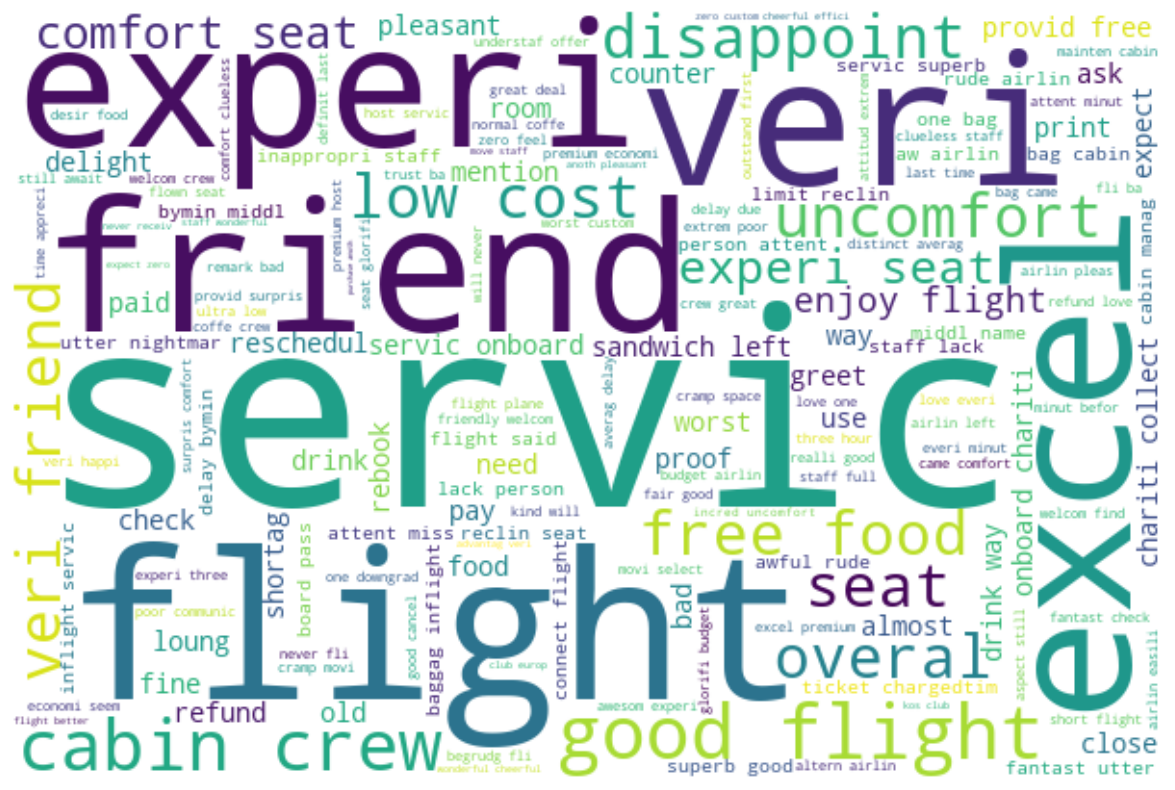

In [21]:
# Plotting Word Cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#df=df[["REVIEW","Positive","Negative","Neutral"]]

# Change reviews to strings
Reviews = ' '.join(review for review in df["REVIEW"])
type(Reviews)

#Create a Word Cloud 
Reviews_wordcloud = WordCloud(width=600, height=400, background_color='White').generate(Reviews)
plt.figure(figsize=(15,10))
plt.imshow(Reviews_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

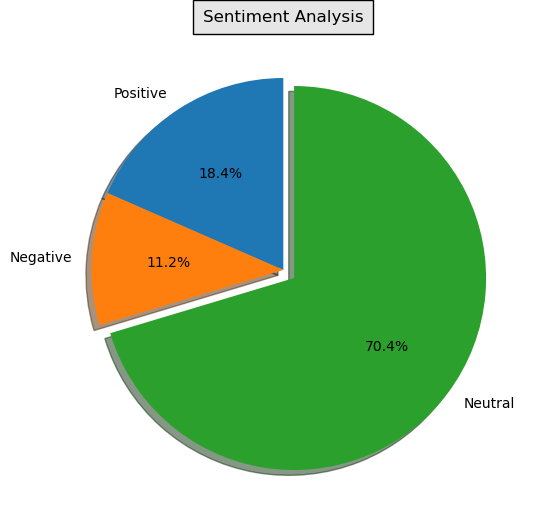

In [116]:
# Create a Pie Chart
from pylab import *

# make a square figure and axes
figure(1, figsize=(6,6))
ax = axes([0.1, 0.1, 0.8, 0.8])

# The slices will be ordered and plotted counter-clockwise.
labels = 'Positive', 'Negative', 'Neutral'
fracs = [110.61, 67.24, 422.15]
explode=(0,  0, 0.07)

pie(fracs, explode=explode, labels=labels,
                autopct='%1.1f%%', shadow=True, startangle=90)
                # The default startangle is 0, which would start
                # the Neutral slice on the x-axis.  With startangle=90,
                # everything is rotated counter-clockwise by 90 degrees,
                # so the plotting starts on the positive y-axis.

title('Sentiment Analysis', bbox={'facecolor':'0.9', 'pad':7})

show()